# Step 1: Installation and Setup

In [ ]:
# Installing TensorFlow
%pip install --upgrade tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.7/620.7 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 90.9 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.19.0
    Uninstalling tensorboard-2.19.0:
      Successfully uninstalled tensorboard-2.19.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.19.0
    Uninstalling tensorflow-2.19.0:
      Successfully uninstalled tensorflow-2.19.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.12.0 requires tensorflow==2.19.0, but you have tensorflow 2.20.0 which is incompatible.
tf-keras 2.19.0 requires tensorflow<2.20,>=2.19, but you have tensorflow 2.20.0 which is incompatible.
tensorflow-text 2.19.0 requires tensorflow<2.20,>=2.19.0, but you have tensorflow 2.20.0 which is inc

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.20.0


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Importing dataset from kaggle to google colab

In [ ]:
# installing kaggle API
! pip install -q kaggle

In [ ]:
# creating a directory as kaggle
! mkdir -p ~/.kaggle

In [ ]:
# importing kaggle API
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
# copy API key to kaggle directory
! cp kaggle.json ~/.kaggle/

In [ ]:
# disable API key
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle competitions list | grep santander

In [ ]:
# list of the datasets
! kaggle datasets list

ref                                                        title                                                  size  lastUpdated                 downloadCount  voteCount  usabilityRating  
---------------------------------------------------------  -----------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
yashdevladdha/uber-ride-analytics-dashboard                Uber Data Analytics Dashboard                      17324552  2025-08-08 11:13:42.920000          46949       1038  1.0              
mdsultanulislamovi/student-stress-monitoring-datasets      Student Stress Monitoring Datasets                    24336  2025-07-24 16:30:01.617000          26024        432  1.0              
msnbehdani/mock-dataset-of-second-hand-car-sales           Car Sales Dataset: Model, Features, and Pricing      501188  2025-08-20 17:47:58.207000           3276         55  1.0              
zubairamuti/shopping-behaviours-dataset 

In [ ]:
# importing dataset from kaggle
! kaggle competitions download -c santander-customer-satisfaction

  0% 0.00/8.25M [00:00<?, ?B/s]
100% 8.25M/8.25M [00:00<00:00, 495MB/s]


In [ ]:
# unzip santander-customer-satisfaction.zip
! unzip santander-customer-satisfaction.zip

Archive:  santander-customer-satisfaction.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
dataset = pd.read_csv('/content/train.csv')

In [ ]:
dataset.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


# Step 3: Data Preprocessing

In [ ]:
dataset.shape

(76020, 371)

In [ ]:
# independent variables (Matrix of features)
x = dataset.drop(labels=['ID','TARGET'], axis=1)

In [ ]:
# dependent variable
y = dataset['TARGET']

In [ ]:
x.shape, y.shape

((76020, 369), (76020,))

In [ ]:
# splitting the dataset into train and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [ ]:
x_train.shape, x_test.shape

((60816, 369), (15204, 369))

# Step 4: Remove constant, Quasi constant and duplicate features

In [ ]:
from sklearn.feature_selection import VarianceThreshold

In [ ]:
rm_f = VarianceThreshold(threshold=0.01)
x_train = rm_f.fit_transform(x_train)
x_test = rm_f.transform(x_test)

In [ ]:
x_train.shape, x_test.shape

((60816, 266), (15204, 266))

In [ ]:
369-266

103

In [ ]:
# remove duplicate features
x_train_t = x_train.T
x_test_t = x_test.T

In [ ]:
x_train_t = pd.DataFrame(x_train_t)
x_test_t = pd.DataFrame(x_test_t)

In [ ]:
x_train_t.shape, x_test_t.shape

((266, 60816), (266, 15204))

In [ ]:
x_train_t.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
261,False
262,False
263,False
264,False


In [ ]:
# number of duplicate features
x_train_t.duplicated().sum()

np.int64(16)

In [ ]:
duplicated_features = x_train_t.duplicated()
print(duplicated_features)

0      False
1      False
2      False
3      False
4      False
       ...  
261    False
262    False
263    False
264    False
265    False
Length: 266, dtype: bool


In [ ]:
features_to_keep = [not index for index in duplicated_features]
print(features_to_keep)

[True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, False, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, False, True, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, False, False, False, False, False, True, True, True, True, True, True, True, True, True, True, True, 

In [ ]:
x_train = x_train_t[features_to_keep].T
x_test = x_test_t[features_to_keep].T

In [ ]:
x_train.shape, x_test.shape

((60816, 250), (15204, 250))

In [ ]:
266-250

16

In [ ]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
x_train

array([[ 0.03826438, -0.78928712, -0.05257837, ..., -0.01895685,
        -0.01990642,  0.07271318],
       [ 0.03826438, -0.63569505, -0.05257837, ..., -0.01895685,
        -0.01990642,  0.73001879],
       [ 0.03826438,  0.51624549, -0.05257837, ..., -0.01895685,
        -0.01990642, -0.0591358 ],
       ...,
       [ 0.0384475 , -0.78928712, -0.05257837, ..., -0.01895685,
        -0.01990642, -0.27045009],
       [ 0.03826438, -0.25171487, -0.01644412, ..., -0.01895685,
        -0.01990642, -0.28583665],
       [ 0.03826438,  1.66818604, -0.05257837, ..., -0.01895685,
        -0.01990642, -0.23183104]])

In [ ]:
x_train.shape, x_test.shape

((60816, 250), (15204, 250))

In [ ]:
# reshape the dataset
x_train = x_train.reshape(60816, 250, 1)
x_test = x_test.reshape(15204, 250, 1)

In [ ]:
x_train.shape, x_test.shape

((60816, 250, 1), (15204, 250, 1))

In [ ]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

# Step 5: Building the model

In [ ]:
# define an object
model = tf.keras.models.Sequential()

In [ ]:
# input layer
model = tf.keras.Sequential([
    tf.keras.Input(shape=(250, 1)),

    # first CNN layer
    tf.keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu'),

    # batch normalization
    tf.keras.layers.BatchNormalization(),

    # maxpool layer
    tf.keras.layers.MaxPool1D(pool_size=2),

    # dropout layer
    tf.keras.layers.Dropout(0.3)
])

In [ ]:
# second CNN layer
model.add(tf.keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu'))

# batch normalization
model.add(tf.keras.layers.BatchNormalization())

# maxpool layer
model.add(tf.keras.layers.MaxPool1D(pool_size=2))

# dropout layer
model.add(tf.keras.layers.Dropout(0.5))

In [ ]:
# third CNN layer
model.add(tf.keras.layers.Conv1D(filters=128, kernel_size=3, activation='relu'))

# batch normalization
model.add(tf.keras.layers.BatchNormalization())

# maxpool layer
model.add(tf.keras.layers.MaxPool1D(pool_size=2))

# dropout layer
model.add(tf.keras.layers.Dropout(0.5))

In [ ]:
# flatten layer
model.add(tf.keras.layers.Flatten())

In [ ]:
# first dense layer (fully connected layer)
model.add(tf.keras.layers.Dense(units=256, activation='relu'))

# dropout layer
model.add(tf.keras.layers.Dropout(0.5))

In [ ]:
# output layer
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_1 (Conv1D)               │ (None, 248, 32)        │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 248, 32)        │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 124, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 124, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 122, 64)        │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 122, 64)        │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 61, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 61, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 59, 128)        │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 59, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ (None, 29, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 29, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3712)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       950,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 982,721 (3.75 MB)

 Trainable params: 982,273 (3.75 MB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.00005)

In [ ]:
# compile the model
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

# Step 6: Training the model

In [ ]:
history =  model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1901/1901 ━━━━━━━━━━━━━━━━━━━━ 139s 70ms/step - accuracy: 0.9429 - loss: 0.2688 - val_accuracy: 0.9460 - val_loss: 0.1910
Epoch 2/10
1901/1901 ━━━━━━━━━━━━━━━━━━━━ 122s 60ms/step - accuracy: 0.9584 - loss: 0.1785 - val_accuracy: 0.9581 - val_loss: 0.1778
Epoch 3/10
1901/1901 ━━━━━━━━━━━━━━━━━━━━ 142s 60ms/step - accuracy: 0.9614 - loss: 0.1668 - val_accuracy: 0.9580 - val_loss: 0.1822
Epoch 4/10
1901/1901 ━━━━━━━━━━━━━━━━━━━━ 118s 62ms/step - accuracy: 0.9595 - loss: 0.1733 - val_accuracy: 0.9579 - val_loss: 0.1773
Epoch 5/10
1901/1901 ━━━━━━━━━━━━━━━━━━━━ 134s 58ms/step - accuracy: 0.9602 - loss: 0.1650 - val_accuracy: 0.9582 - val_loss: 0.2009
Epoch 6/10
1901/1901 ━━━━━━━━━━━━━━━━━━━━ 146s 60ms/step - accuracy: 0.9609 - loss: 0.1610 - val_accuracy: 0.9582 - val_loss: 0.1833
Epoch 7/10
1901/1901 ━━━━━━━━━━━━━━━━━━━━ 109s 58ms/step - accuracy: 0.9618 - loss: 0.1568 - val_accuracy: 0.9582 - val_loss: 0.1733
Epoch 8/10
1901/1901 ━━━━━━━━━━━━━━━━━━━━ 138s 55ms/step - accuracy: 

In [ ]:
# model predictions
y_pred = model.predict(x_test)

476/476 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step


In [ ]:
y_pred = (y_pred > 0.5).astype("int64")

In [ ]:
print(y_pred[12]), print(y_test[12])

[0]
0


(None, None)

In [ ]:
# confusion matrix
from sklearn.metrics import  confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[14568     2]
 [  634     0]]


In [ ]:
acc_cm = accuracy_score(y_test, y_pred)

In [ ]:
print(acc_cm)

0.9581689029202841


# Step 7: Learning Curve

In [ ]:
def learning_curve(history, epoch):

  # training vs validation accuracy
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'val'], loc='upper left')
  plt.show()

  # training vs validation loss
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'val'], loc='upper left')
  plt.show()

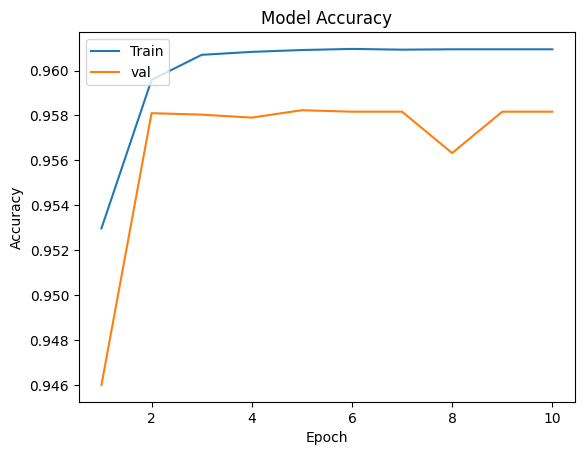

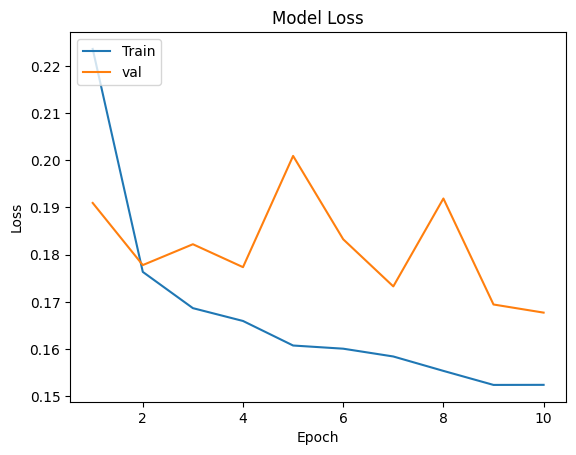

In [ ]:
learning_curve(history, 10)